# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


# Data Preprocessing

## Download file Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ganti path file dengan path sesuai dengan file di Google Drive
file_path = '/content/drive/My Drive/mini project/5/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv'

# Membaca file CSV ke dalam DataFrame Pandas
df = pd.read_csv(file_path)

In [ ]:
df.shape

(287, 25)

In [ ]:
df.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
47,wingedPorpoise5,106141,Belum_menikah,Wanita,FullTime,Product Design (UI & UX),Senior_level,Bagus,Jakarta Barat,Website,...,+6289691256xxx,wingedPorpoise5929@outlook.com,Sarjana,1,NaN,masih_bekerja,1975-10-22,2015-2-16,2020-1-23,-
220,soreDunbird3,101434,Belum_menikah,Pria,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Utara,LinkedIn,...,+6285615899xxx,soreDunbird3996@hotmail.com,Magister,1,NaN,NaN,1982-07-22,2011-5-16,2016-3-30,-
261,madSardines6,106459,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,...,+6281393313xxx,madSardines6012@yahoo.com,Sarjana,1,NaN,NaN,1985-01-07,2011-01-10,2017-04-05,-


## Handling data null
(Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat sesuai dengan skala ukur pada data)


In [ ]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df[['SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','IkutProgramLOP','AlasanResign']].describe()

,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,IkutProgramLOP
count,282.000000,284.000000,286.000000,29.000000
mean,3.904255,1.179577,0.412587,0.517241
std,0.913355,2.294441,1.275016,0.508548
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,1.000000
75%,5.000000,0.000000,0.000000,1.000000
max,5.000000,8.000000,6.000000,1.000000


In [ ]:
df['IkutProgramLOP'].value_counts()

1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64

In [ ]:
# kolom numerik null: SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, IkutProgramLOP
# handle null kolom numerik
df ['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())
df ['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median())
df ['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median())
df ['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())
df ['IkutProgramLOP'] = df['IkutProgramLOP'].fillna(0)

In [ ]:
df['AlasanResign'].describe(include='object')

count               221
unique               11
top       masih_bekerja
freq                132
Name: AlasanResign, dtype: object

In [ ]:
# kolom kategorik null: AlasanResign
# handle null kolom kategorik
df ['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')

In [ ]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0


## Mengganti value yang tidak sesuai
(Hint: Perhatikan kolom "PernahBekerja")


In [ ]:
df['PernahBekerja'].value_counts()

1      286
yes      1
Name: PernahBekerja, dtype: int64

In [ ]:
# Ganti nilai yang tidak sesuai dalam kolom Kolom1 dengan 1
df['PernahBekerja'] = pd.to_numeric(df['PernahBekerja'], errors='coerce').fillna(1)
df['PernahBekerja'].value_counts()

1.0    287
Name: PernahBekerja, dtype: int64

## Membuang data yang tidak diperlukan
(Hint: Cari dan buang kolom yang memiliki satu unique value (konstanta))

In [ ]:
df.nunique()

Username                              285
EnterpriseID                          287
StatusPernikahan                        5
JenisKelamin                            2
StatusKepegawaian                       3
Pekerjaan                              14
JenjangKarir                            3
PerformancePegawai                      5
AsalDaerah                              5
HiringPlatform                          9
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
NomorHP                               287
Email                                 287
TingkatPendidikan                       3
PernahBekerja                           1
IkutProgramLOP                          2
AlasanResign                           11
TanggalLahir                          284
TanggalHiring                          97
TanggalPenilaianKaryawan          

In [ ]:
df.drop(columns=['PernahBekerja'],inplace=True)

In [ ]:
df.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'IkutProgramLOP', 'AlasanResign',
       'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan',
       'TanggalResign'],
      dtype='object')

# Annual Report on Employee Number Changes

## Membuat dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign
(Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [ ]:
df['TanggalResign']

0               -
1       2018-6-16
2       2014-9-24
3               -
4      2018-09-06
          ...    
282             -
283    2017-11-15
284    2018-06-08
285    2018-04-01
286             -
Name: TanggalResign, Length: 287, dtype: object

In [ ]:
# Ubah tipe kolom tanggal menjadi tipe datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], errors='coerce')
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], errors='coerce')
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Buat kolom-kolom baru
df['year_lahir'] = df['TanggalLahir'].dt.year
df['year_hiring'] = df['TanggalHiring'].dt.year
df['year_pk'] = df['TanggalPenilaianKaryawan'].dt.year
df['year_resign'] = df['TanggalResign'].dt.year

In [ ]:
dfg1 = df.groupby(['year_hiring']).agg({'Username':['count']}).reset_index()
dfg1.columns=['year','count_hiring']

dfg1

,year,count_hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [ ]:
dfg2 = df.groupby(['year_resign']).agg({'Username':['count']}).reset_index()
dfg2.columns=['year','count_resign']

dfg2

,year,count_resign
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


## Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh
(Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu)


In [ ]:
dfm1= dfg1.merge(dfg2,
                 left_on='year',
                 right_on='year',
                 how='outer')
dfm1

,year,count_hiring,count_resign
0,2006.0,1.0,NaN
1,2007.0,2.0,NaN
2,2008.0,2.0,NaN
3,2009.0,7.0,NaN
4,2010.0,8.0,NaN
5,2011.0,76.0,NaN
6,2012.0,41.0,NaN
7,2013.0,43.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


## Melakukan imputation pada data tahun yang kosong sesuai urutan
(Hint: Gunakan fillna)


In [ ]:
dfm1.isnull().sum()

year            0
count_hiring    2
count_resign    7
dtype: int64

In [ ]:
dfm1 ['count_hiring'] = dfm1['count_hiring'].fillna(0)
dfm1 ['count_resign'] = dfm1['count_resign'].fillna(0)

In [ ]:
dfm1.isnull().sum()

year            0
count_hiring    0
count_resign    0
dtype: int64

## Menghitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2)
(Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya)


In [ ]:
dfm1['total_kry_stay'] = 0  # Inisialisasi kolom total_kry_stay dengan nilai 0
for index, row in dfm1.iterrows():
    previous_year = dfm1.loc[dfm1['year'] == row['year'] - 1, 'total_kry_stay']
    if not previous_year.empty:
        dfm1.at[index, 'total_kry_stay'] = row['count_hiring'] + previous_year.values[0] - row['count_resign']

In [ ]:
dfm1 ['perubahan_kry_year'] = dfm1['total_kry_stay'] - dfm1['count_resign']

In [ ]:
dfm1

,year,count_hiring,count_resign,total_kry_stay,perubahan_kry_year
0,2006.0,1.0,0.0,0,0.0
1,2007.0,2.0,0.0,2,2.0
2,2008.0,2.0,0.0,4,4.0
3,2009.0,7.0,0.0,11,11.0
4,2010.0,8.0,0.0,19,19.0
5,2011.0,76.0,0.0,95,95.0
6,2012.0,41.0,0.0,136,136.0
7,2013.0,43.0,5.0,174,169.0
8,2014.0,56.0,12.0,218,206.0
9,2015.0,31.0,8.0,241,233.0


## Membuat plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada
(Hint: Perhatikan jenis plot yang digunakan)


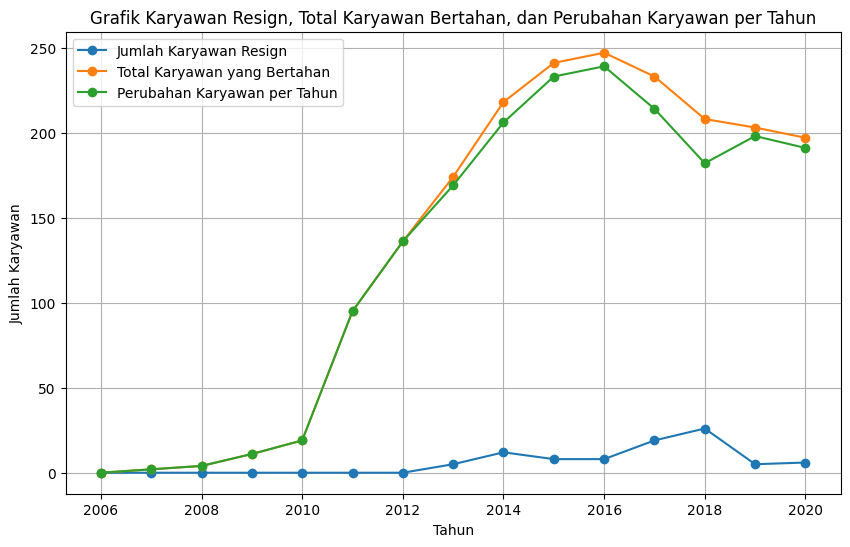

In [ ]:
# Menggunakan Matplotlib untuk membuat line plot
plt.figure(figsize=(10, 6))  # Ukuran plot

# Menggambarkan line plot untuk jumlah karyawan resign
plt.plot(dfm1['year'], dfm1['count_resign'], label='Jumlah Karyawan Resign', marker='o', linestyle='-')

# Menggambarkan line plot untuk total karyawan yang bertahan
plt.plot(dfm1['year'], dfm1['total_kry_stay'], label='Total Karyawan yang Bertahan', marker='o', linestyle='-')

# Menggambarkan line plot untuk perubahan karyawan per tahun
plt.plot(dfm1['year'], dfm1['perubahan_kry_year'], label='Perubahan Karyawan per Tahun', marker='o', linestyle='-')

# Menambahkan label sumbu dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.title('Grafik Karyawan Resign, Total Karyawan Bertahan, dan Perubahan Karyawan per Tahun')

# Menambahkan legenda
plt.legend()

# Menampilkan grid pada plot
plt.grid(True)

# Menampilkan plot
plt.show()


## Interpretasi

grafik di atas menunjukkan bahwa pada 3 tahun terakhir kondisi perusahaan cukup menghawatirkan karena
- pada tahun 2018 jumlah karyawan resign mencapai puncaknya serta jumlah karyawan bertahan dan jumlah perubahan karyawan pertahun mengalami penurunan.
- pada tahun 2019 dan 2020 jumlah karyawan resign menurun namun belum cukup dapat dikatakan perusahaan sehat karena garis total karyawan bertahan dan perubahan karyawan pertahun sejajar dan masih mengalami penurunan.

# Resign Reason Analysis for Employee Attrition Management Strategy

## Membuat dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign
Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum


In [ ]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
IkutProgramLOP                          0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                     

In [ ]:
df ['TanggalResign'] = df['TanggalResign'].fillna(0)
df ['year_resign'] = df['year_resign'].fillna(0)

In [ ]:
# Membuat kolom 'is_resign' berdasarkan syarat
df['is_resign'] = np.where((df['year_resign'] != 0) & ~df['year_resign'].isna(), 1, 0)

In [ ]:
df.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,year_lahir,year_hiring,year_pk,year_resign,is_resign
106,troubledThrushe9,101192,-,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,...,toxic_culture,1987-01-07,2013-01-07,2020-01-30,2014-08-19 00:00:00,1987,2013,2020,2014.0,1
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16 00:00:00,1984,2014,2020,2018.0,1
111,thriftyHare2,101407,Lainnya,Wanita,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,...,masih_bekerja,1970-09-22,2012-09-24,2014-04-02,0,1970,2012,2014,0.0,0


In [ ]:
# Mengelompokkan dan menghitung jumlah karyawan yang telah resign
dfg3 = df[df['is_resign'] == 1].groupby('Pekerjaan').size().reset_index(name='count_resign_1')

dfg3

,Pekerjaan,count_resign_1
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [ ]:
# Mengelompokkan dan menghitung jumlah karyawan yang belum resign
dfg4 = df[df['is_resign'] == 0].groupby('Pekerjaan').size().reset_index(name='count_resign_0')

dfg4

,Pekerjaan,count_resign_0
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


## Menggabungkan kedua dataframe tersebut berdasarkan key Pekerjaan
Hint: Gunakan outer join


In [ ]:
dfm2= dfg3.merge(dfg4,
                 left_on='Pekerjaan',
                 right_on='Pekerjaan',
                 how='outer')
dfm2

,Pekerjaan,count_resign_1,count_resign_0
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,Product Design (UI & UX),9.0,15
3,Product Manager,6.0,11
4,Software Engineer (Android),7.0,17
5,Software Engineer (Back End),28.0,81
6,Software Engineer (Front End),28.0,44
7,DevOps Engineer,NaN,3
8,Digital Product Manager,NaN,2
9,Machine Learning Engineer,NaN,2


In [ ]:
dfm2.isnull().sum()

Pekerjaan         0
count_resign_1    7
count_resign_0    0
dtype: int64

In [ ]:
dfm2 ['count_resign_1'] = dfm2['count_resign_1'].fillna(0)

## Membuat dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign)
Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee


In [ ]:
dfm2['total_employee'] = dfm2['count_resign_0'] + dfm2['count_resign_1']

dfm2

,Pekerjaan,count_resign_1,count_resign_0,total_employee
0,Data Analyst,8.0,8,16.0
1,Data Engineer,3.0,7,10.0
2,Product Design (UI & UX),9.0,15,24.0
3,Product Manager,6.0,11,17.0
4,Software Engineer (Android),7.0,17,24.0
5,Software Engineer (Back End),28.0,81,109.0
6,Software Engineer (Front End),28.0,44,72.0
7,DevOps Engineer,0.0,3,3.0
8,Digital Product Manager,0.0,2,2.0
9,Machine Learning Engineer,0.0,2,2.0


In [ ]:
dfm2['percentage_employee_stay'] = (dfm2['count_resign_0']/dfm2['total_employee'])*100
dfm2['percentage_employee_stay'] = dfm2['percentage_employee_stay'].round(2)
dfm2 = dfm2.sort_values(by='percentage_employee_stay', ascending= False).reset_index(drop=True)

dfm2

,Pekerjaan,count_resign_1,count_resign_0,total_employee,percentage_employee_stay
0,DevOps Engineer,0.0,3,3.0,100.00
1,Digital Product Manager,0.0,2,2.0,100.00
2,Machine Learning Engineer,0.0,2,2.0,100.00
3,Product Design (UX Researcher),0.0,1,1.0,100.00
4,Scrum Master,0.0,3,3.0,100.00
5,Software Architect,0.0,1,1.0,100.00
6,Software Engineer (iOS),0.0,3,3.0,100.00
7,Software Engineer (Back End),28.0,81,109.0,74.31
8,Software Engineer (Android),7.0,17,24.0,70.83
9,Data Engineer,3.0,7,10.0,70.00


## Membuat plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya
Hint: Perhatikan jenis plot yang digunakan


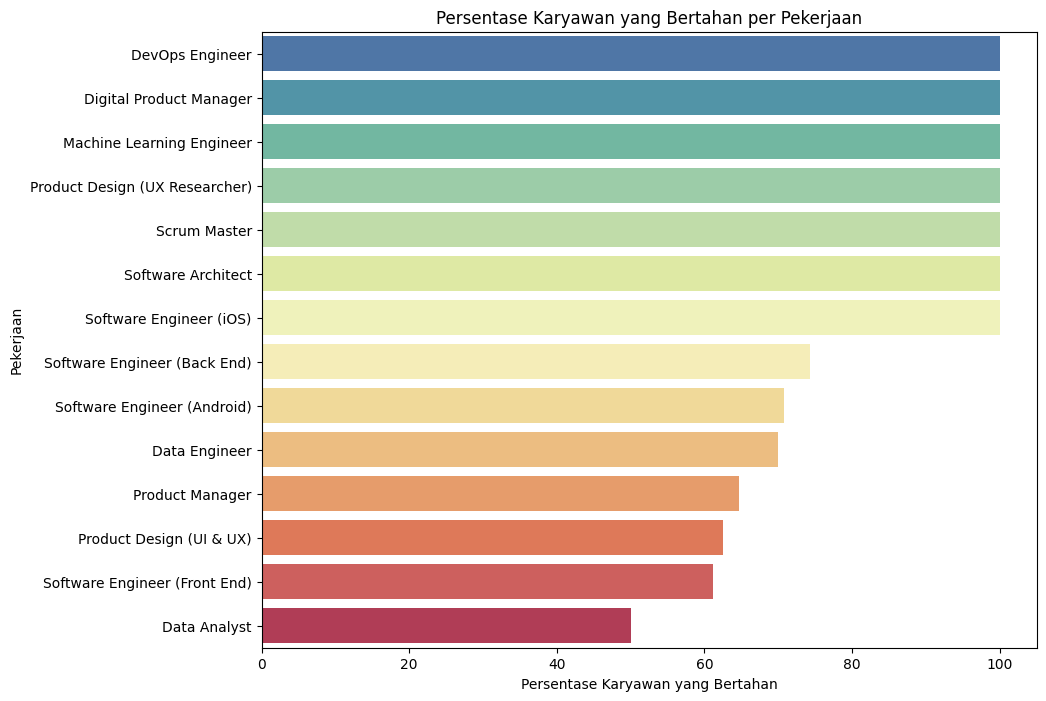

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfm2, y='Pekerjaan', x='percentage_employee_stay', orient='h', palette='Spectral_r')

# Menambahkan judul
plt.title('Persentase Karyawan yang Bertahan per Pekerjaan')

# Mengedit label sumbu x dan y
plt.xlabel('Persentase Karyawan yang Bertahan')
plt.ylabel('Pekerjaan')

plt.show()

## Mengetahui divisi yang memiliki tingkat resign tertinggi, kemudian membuat tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat


In [ ]:
dfm2['percentage_resign'] = (dfm2['count_resign_1']/dfm2['total_employee'])*100
dfm2['percentage_resign'] = dfm2['percentage_resign'].round(2)

dfm2

,Pekerjaan,count_resign_1,count_resign_0,total_employee,percentage_employee_stay,percentage_resign
0,DevOps Engineer,0.0,3,3.0,100.00,0.00
1,Digital Product Manager,0.0,2,2.0,100.00,0.00
2,Machine Learning Engineer,0.0,2,2.0,100.00,0.00
3,Product Design (UX Researcher),0.0,1,1.0,100.00,0.00
4,Scrum Master,0.0,3,3.0,100.00,0.00
5,Software Architect,0.0,1,1.0,100.00,0.00
6,Software Engineer (iOS),0.0,3,3.0,100.00,0.00
7,Software Engineer (Back End),28.0,81,109.0,74.31,25.69
8,Software Engineer (Android),7.0,17,24.0,70.83,29.17
9,Data Engineer,3.0,7,10.0,70.00,30.00


In [ ]:
# Filter berdasarkan 'Pekerjaan' yang sama dengan 'Data Analyst' dan 'is_resign' yang sama dengan 1
filtered_df = df[(df['Pekerjaan'] == 'Data Analyst') & (df['is_resign'] == 1)]

# Membuat tabel agregasi berdasarkan kategori pekerjaan tertentu
dfg5 = filtered_df.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah_Resign')

dfg5

,JenjangKarir,PerformancePegawai,AlasanResign,Jumlah_Resign
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


## Membuat plot yang menampilkan tabel agregasi pada tahap sebelumnya
Hint: Perhatikan jenis plot yang digunakan


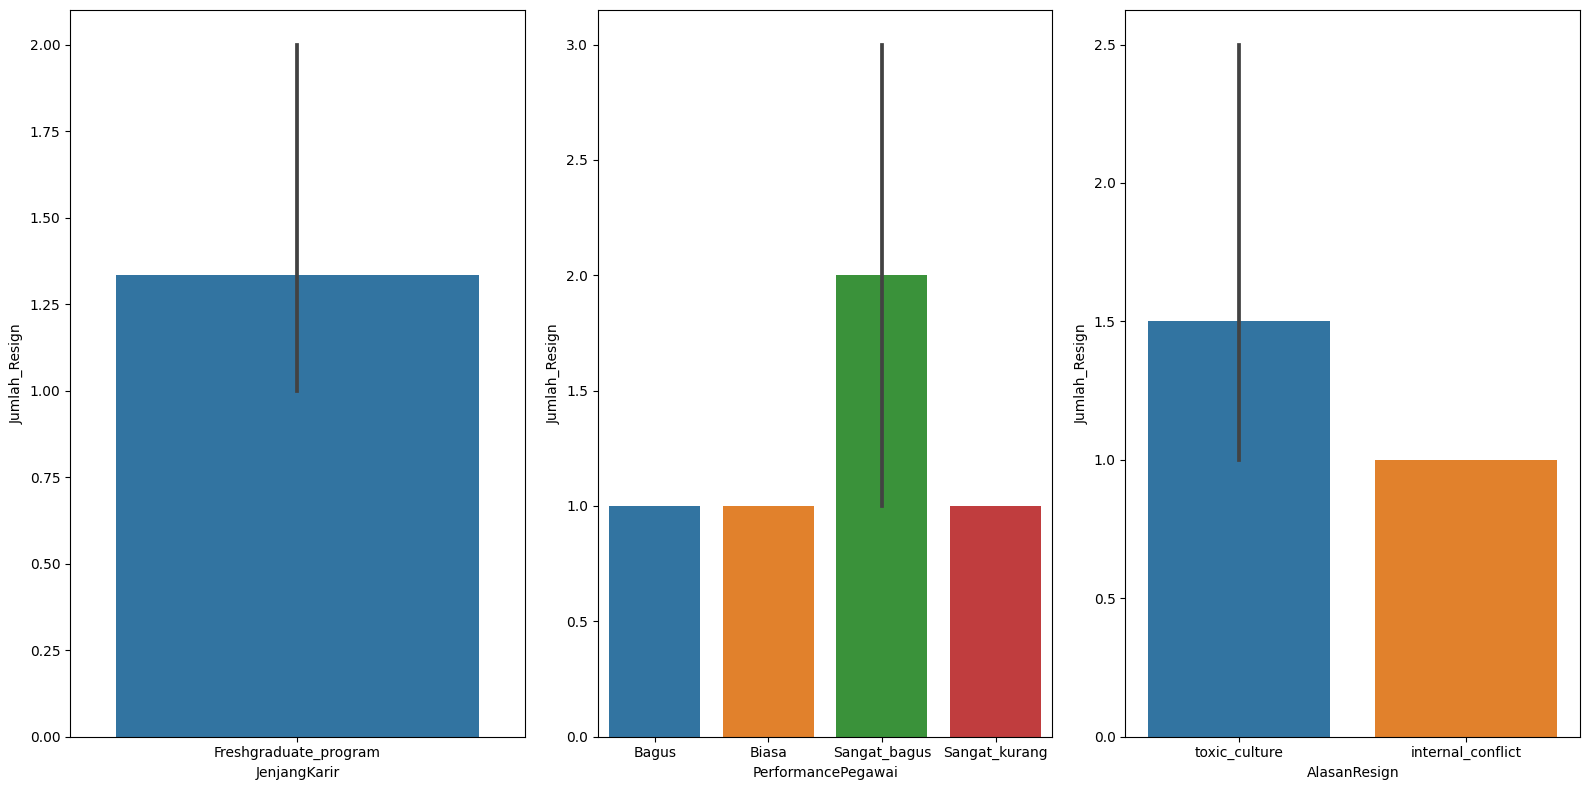

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.barplot (data = dfg5, x = 'JenjangKarir', y ='Jumlah_Resign')
plt.subplot(1,3,2)
sns.barplot (data = dfg5, x = 'PerformancePegawai', y ='Jumlah_Resign')
plt.subplot(1,3,3)
sns.barplot (data = dfg5, x = 'AlasanResign', y ='Jumlah_Resign')
plt.tight_layout()

## Interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya

grafik di atas menunjukkan bahwa penyebab karyawan resign pada divisi tersebut adalah toxic culture pada lingkungan kerja.
hal tersebut menunjukkan bahwa manajemen perlu melakukan upaya untuk meminimalkan budaya yang bersifat toxic pada lingkungan kerja, mengingat dampak hal tersebut menyebabkan perusahaan kehilangan sdm yang memiliki performance sangat bagus.
saran hal yang perlu dilakukan:
- Tentukan Nilai dan Etika yang Jelas: Definisikan dan komunikasikan nilai-nilai inti dan etika perusahaan kepada seluruh karyawan. Pastikan semua orang memahami apa yang diharapkan dari mereka dalam berinteraksi dan bekerja.
- Kawal Beban Kerja: Pastikan bahwa beban kerja yang wajar dan seimbang. Beban kerja yang berlebihan dapat menyebabkan stres dan ketidakpuasan karyawan.
- Evaluasi dan Koreksi Secara Berkala: Terus evaluasi budaya kerja dan ambil tindakan korektif jika perlu. Berikan survei karyawan secara rutin dan reaksi atas masukan yang diterima.

# Build an Automated Resignation Behaviour Prediction Using Machine Learning

## Melakukan check kembali kepada tahap data preprocessing yang dilakukan pada tugas 1, mulai dari mendeteksi ada tidaknya missing value pada baris dan kolom, deteksi data duplikat, menanggulangi pencilan pada data, transformasi pada data seperti categorical encoding, melakukan feature engineering, dan feature selection berdasarkan domain expertise.
Hint: Perhatikan fitur-fitur yang sekiranya perlu ditransformasi, jumlah fitur yang direkomendasikan akhir yang direkomendasikan tidak melebihi 40, membuang fitur-fitur yang sekiranya tidak bermakna secara dunia nyata terhadap model.


### data null

In [ ]:
# data null
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
year_lahir                            0


### data duplikat

In [ ]:
# data duplicated
df.duplicated().sum()

0

In [ ]:
# data duplicated
df['Username'].duplicated().sum()

2

In [ ]:
df.describe(include='object')

,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,11,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,masih_bekerja,0
freq,2,132,167,217,109,169,85,72,85,1,1,176,198,198


In [ ]:
# melihat data duplikat
df[df['Username'] == 'boredEggs0']

# data duplikat tidak dihapus karena EnterpriseID berbeda

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,year_lahir,year_hiring,year_pk,year_resign,is_resign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,ganti_karir,1974-01-12,2011-01-10,2017-01-30,2016-03-31 00:00:00,1974,2011,2017,2016.0,1
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,jam_kerja,1967-06-03,2013-04-01,2020-02-13,2014-08-19 00:00:00,1967,2013,2020,2014.0,1


### data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [ ]:
# Mengubah tipe data kolom 'year_resign' menjadi integer
df['year_resign'] = df['year_resign'].astype(int)

### unvalid value

In [ ]:
df['StatusPernikahan'].value_counts()

Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

In [ ]:
# Ganti '-' dengan 'lainnya' hanya di kolom 'StatusPernikahan'
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Lainnya')

### data outliers


In [ ]:
# List of column names containing numerical data
nums = df.select_dtypes(include='number').columns.tolist()

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

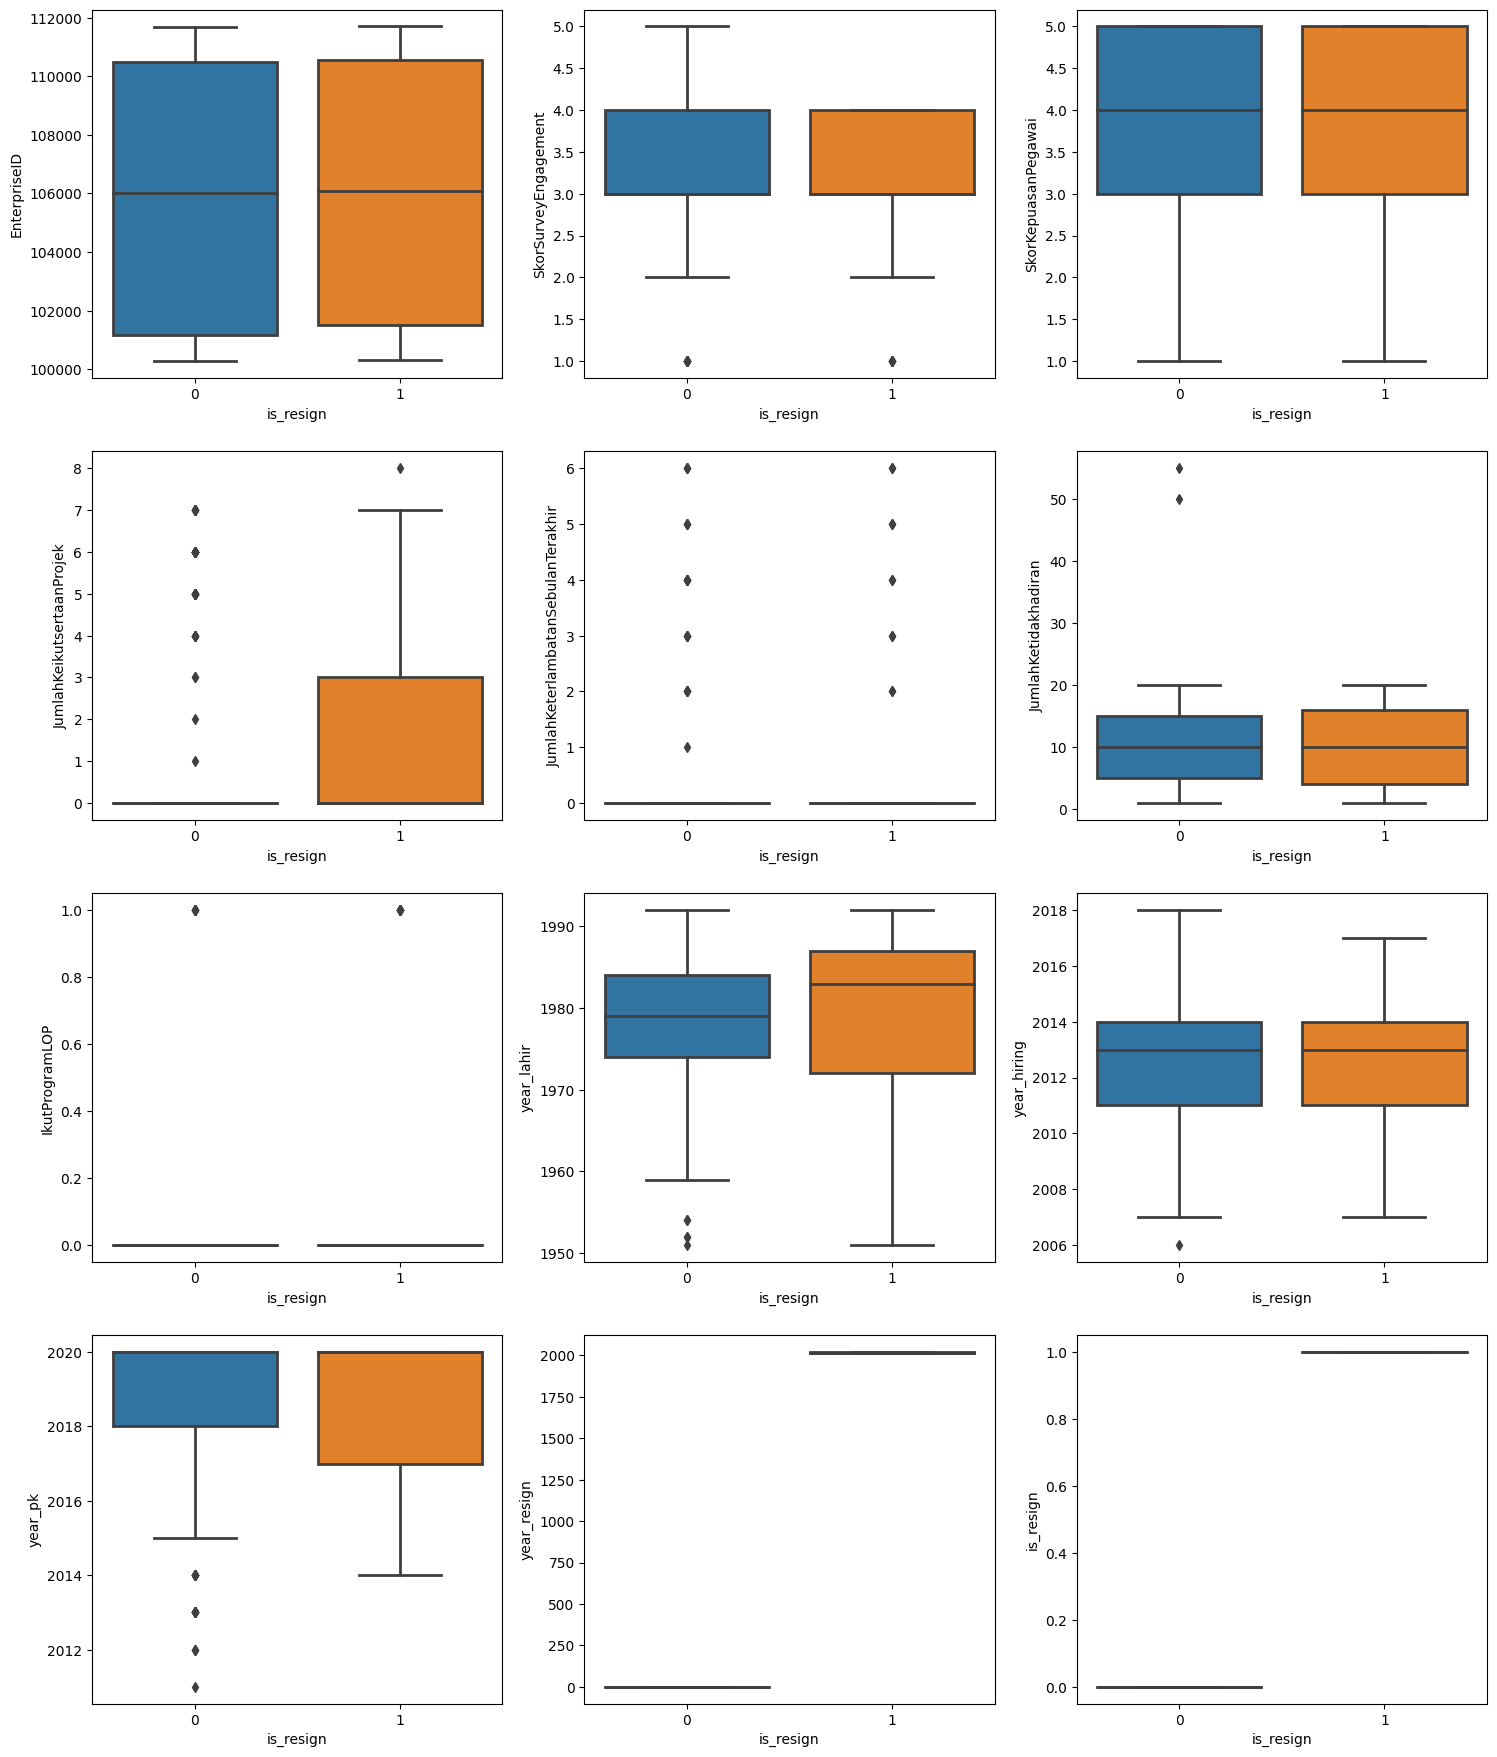

In [ ]:
import math

plt.figure(figsize=(18,22))
for i in range (0, len(nums)):
    plt.subplot(math.ceil(len(nums)/3), 3, i+1)
    sns.boxplot(data=df, y=nums[i], x='is_resign', linewidth=2, orient='v')

In [ ]:
df[df['JumlahKetidakhadiran']>20]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,year_lahir,year_hiring,year_pk,year_resign,is_resign
12,yearningBagels0,100895,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,...,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,0,1988,2013,2020,0,0
115,wingedLeopard7,106436,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Pusat,Google_Search,...,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,0,1973,2011,2020,0,0


In [ ]:
#df = df[df['JumlahKetidakhadiran'] <= 20]  # Menghapus baris dengan nilai 'JumlahKetidakhadiran' > 20

In [ ]:
df[df['JumlahKetidakhadiran']>20]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,year_lahir,year_hiring,year_pk,year_resign,is_resign
12,yearningBagels0,100895,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,...,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,0,1988,2013,2020,0,0
115,wingedLeopard7,106436,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Pusat,Google_Search,...,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,0,1973,2011,2020,0,0


In [ ]:
# menghapus outlier menggunakan persentil 99
percentile = 99

# Hitung nilai persentil
threshold = df['SkorSurveyEngagement'].quantile(percentile / 100)
threshold = df['JumlahKeikutsertaanProjek'].quantile(percentile / 100)
threshold = df['JumlahKeterlambatanSebulanTerakhir'].quantile(percentile / 100)
threshold = df['JumlahKetidakhadiran'].quantile(percentile / 100)

# Hapus outlier berdasarkan persentil
df = df[df['SkorSurveyEngagement'] <= threshold]
df = df[df['JumlahKeikutsertaanProjek'] <= threshold]
df = df[df['JumlahKeterlambatanSebulanTerakhir'] <= threshold]
df = df[df['JumlahKetidakhadiran'] <= threshold]


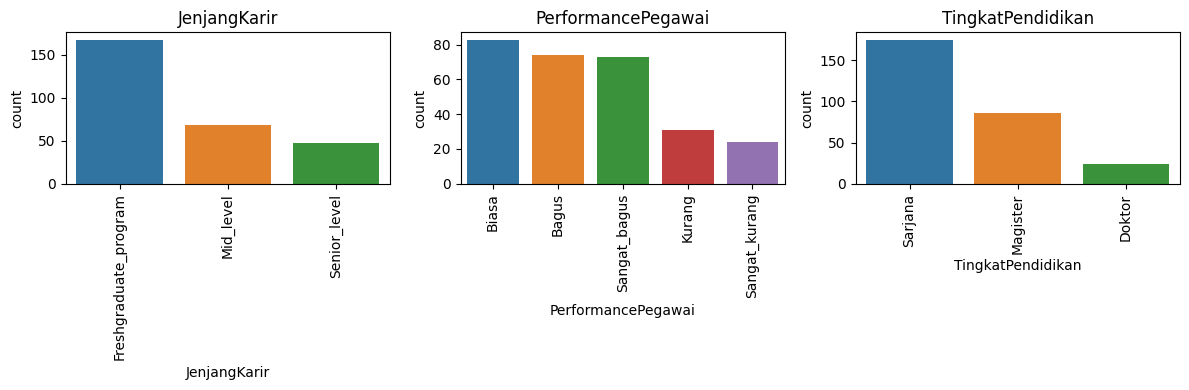

In [ ]:
# Menentukan kolom kategorikal dalam DataFrame
cats_cols1 = ['JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']

# Menghitung jumlah kolom kategorikal
num_cats_cols1 = len(cats_cols1)

# Mengatur ukuran plot
fig, axes = plt.subplots(1, num_cats_cols1, figsize=(num_cats_cols1*4, 4))

# Loop untuk membuat countplot pada setiap kolom kategorikal
for i, col in enumerate(cats_cols1):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)  # Mengatur rotasi label sumbu x

plt.tight_layout()
plt.show()


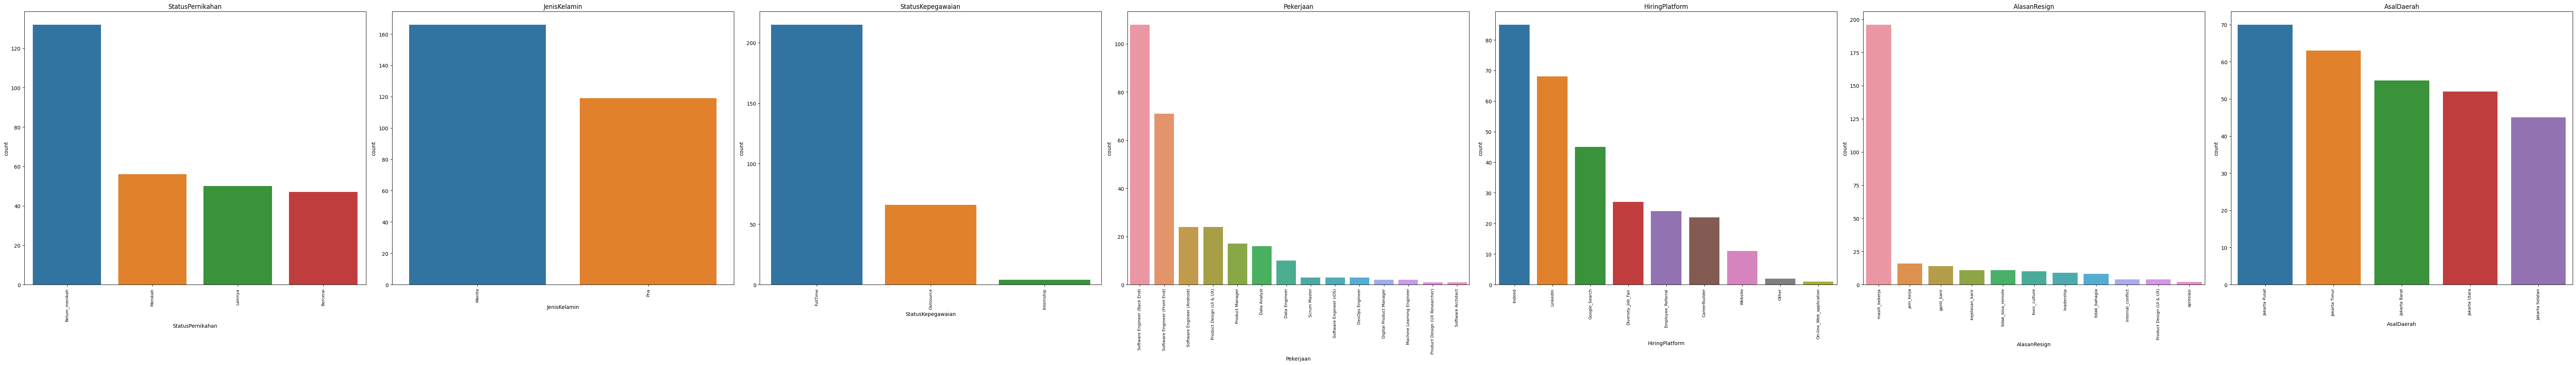

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan kolom kategorikal dalam DataFrame
cats_cols2 = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','HiringPlatform','AlasanResign','AsalDaerah']

# Menghitung jumlah kolom kategorikal
num_cats_cols2 = len(cats_cols2)

# Mengatur ukuran plot
fig, axes = plt.subplots(1, num_cats_cols2, figsize=(num_cats_cols2*10, 10))

# Loop untuk membuat countplot pada setiap kolom kategorikal
for i, col in enumerate(cats_cols2):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)  # Mengatur rotasi dan ukuran font sumbu x

plt.tight_layout()
plt.show()


### Multivariate analysis untuk membantu mencari fitur yang berkorelasi

<Axes: >

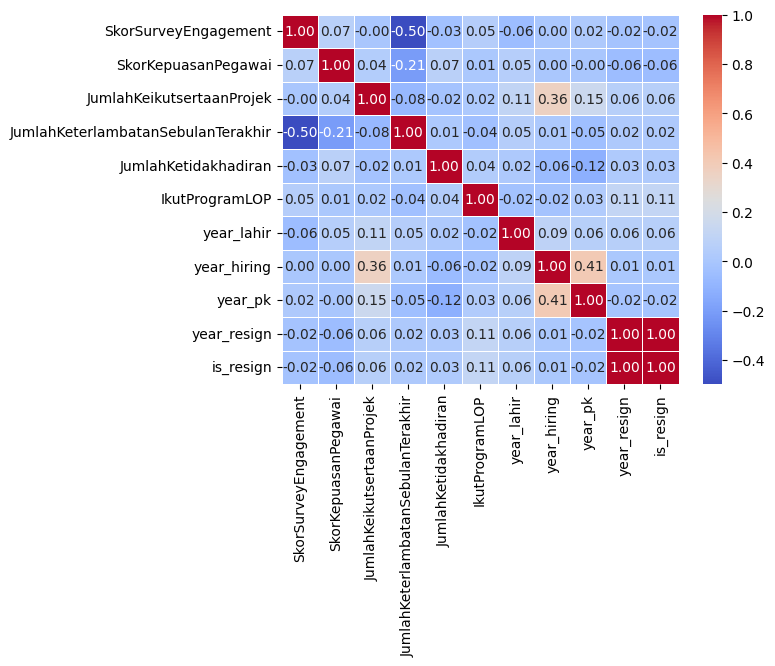

In [ ]:
corr = df.select_dtypes(include='number').columns.tolist()[1:]
sns.heatmap(df[corr].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

### feature selection
berdasarkan domain expertise

In [ ]:
df.shape

(285, 29)

In [ ]:
df.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'IkutProgramLOP', 'AlasanResign',
       'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan',
       'TanggalResign', 'year_lahir', 'year_hiring', 'year_pk', 'year_resign',
       'is_resign'],
      dtype='object')

In [ ]:
df.drop(columns=['Username','EnterpriseID','NomorHP','Email',
                 'JenisKelamin','AsalDaerah','HiringPlatform',
                 'StatusPernikahan','StatusKepegawaian','IkutProgramLOP',
                 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan','TanggalResign',
                 'year_lahir','year_hiring','year_pk','year_resign'],inplace=True)

<Axes: >

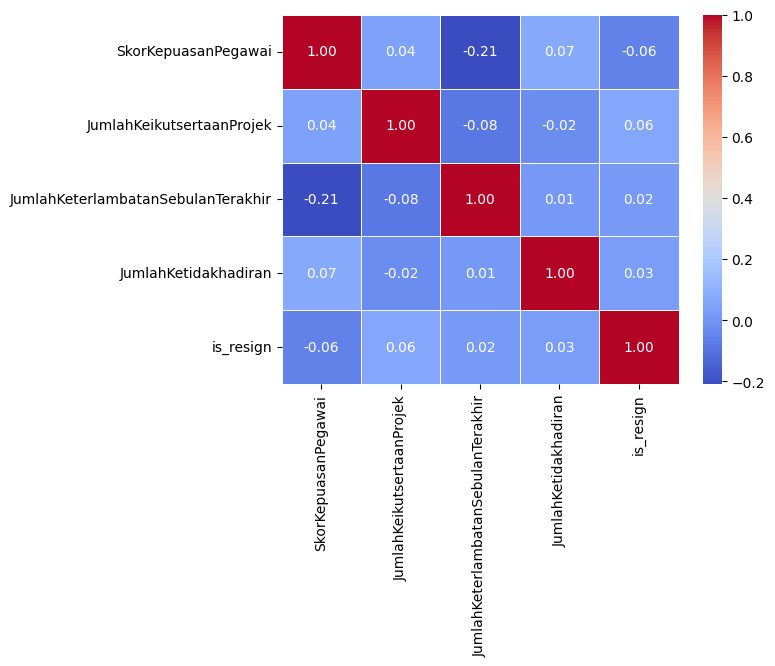

In [ ]:
corr = df.select_dtypes(include='number').columns.tolist()[1:]
sns.heatmap(df[corr].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

### transformasi data (encoding)

In [ ]:
df.columns

Index(['Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'AlasanResign',
       'is_resign'],
      dtype='object')

- tipe data binary: mengandung kata yes-no maupun true-false.
- tipe data ordinal: kategori dapat diurutkan.
- tipe data nominal: kategori tidak dapat diurutkan.
- data ordinal menggunakan Label Encoding.
- data nominal menggunakan One Hot Encoding.

In [ ]:
df['TingkatPendidikan'].value_counts()


Sarjana     175
Magister     86
Doktor       24
Name: TingkatPendidikan, dtype: int64

In [ ]:
# Label Encode

# JenjangKarir
mapping_jk = {'Freshgraduate_program':0,'Mid_level':1,'Senior_level':2}
df['JenjangKarir'] = df['JenjangKarir'].map(mapping_jk)

# PerformancePegawai
mapping_pp = {'Biasa':0,'Bagus':1, 'Sangat_bagus':2, 'Kurang':3, 'Sangat_kurang':4}
df['PerformancePegawai'] = df['PerformancePegawai'].map(mapping_pp)

# TingkatPendidikan
mapping_tp = {'Sarjana':0,'Magister':1,'Doktor':2}
df['TingkatPendidikan'] = df['TingkatPendidikan'].map(mapping_tp)

In [ ]:
# OHE with pandas

df = pd.get_dummies(df, prefix=['Pekerjaan'], columns=['Pekerjaan'])
df = pd.get_dummies(df, prefix=['AlasanResign'], columns=['AlasanResign'])

### feature engineering

fitur engineering tidak dilakukan karena data sudah cukup dikelompokkan dengan baik.

In [ ]:
df.columns

Index(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'is_resign', 'Pekerjaan_Data Analyst',
       'Pekerjaan_Data Engineer', 'Pekerjaan_DevOps Engineer',
       'Pekerjaan_Digital Product Manager',
       'Pekerjaan_Machine Learning Engineer',
       'Pekerjaan_Product Design (UI & UX)',
       'Pekerjaan_Product Design (UX Researcher)', 'Pekerjaan_Product Manager',
       'Pekerjaan_Scrum Master', 'Pekerjaan_Software Architect',
       'Pekerjaan_Software Engineer (Android)',
       'Pekerjaan_Software Engineer (Back End)',
       'Pekerjaan_Software Engineer (Front End)',
       'Pekerjaan_Software Engineer (iOS)',
       'AlasanResign_Product Design (UI & UX)', 'AlasanResign_apresiasi',
       'AlasanResign_ganti_karir', 'AlasanResign_internal_conflict',
       'AlasanResign_jam_kerja', 'AlasanResign_kejelasan_ka

In [ ]:
df.shape

(285, 34)

## Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yang ada (imbalanced learning).           
Hint: Cari metode yang paling cocok untuk menyeimbangkan proporsi data training (berdasarkan variable target) agar model nantinya tidak bersifat diskriminatif


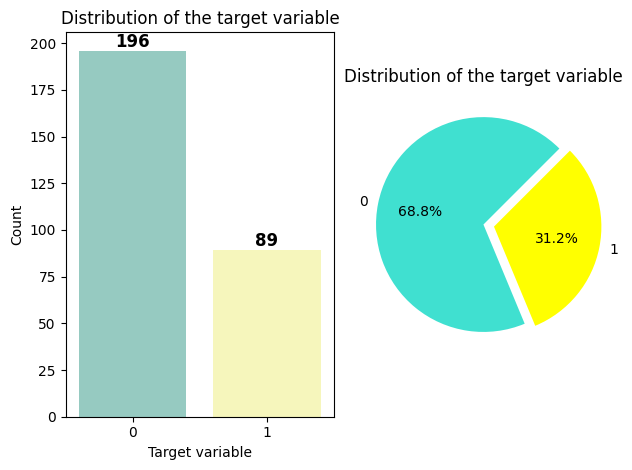

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
ax = sns.countplot(x='is_resign', data=df, palette="Set3")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.is_resign.value_counts(), labels = df.is_resign.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of the target variable')
plt.tight_layout()
plt.show()

### split data fitur dan target

In [ ]:
# Select all columns except 'is_resign' to create featr
x = df.drop(columns=['is_resign'])

# Create targt with only the 'is_resign' column
y = df[['is_resign']]

In [ ]:
x.shape

(285, 33)

In [ ]:
y.shape

(285, 1)

### standardisasi

In [ ]:
to_std = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
          'JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in range(0,len(to_std)):
  x[to_std[i]] = StandardScaler().fit_transform(x[to_std[i]].values.reshape(len(x), 1))

### Handling Imbalance
oversampling

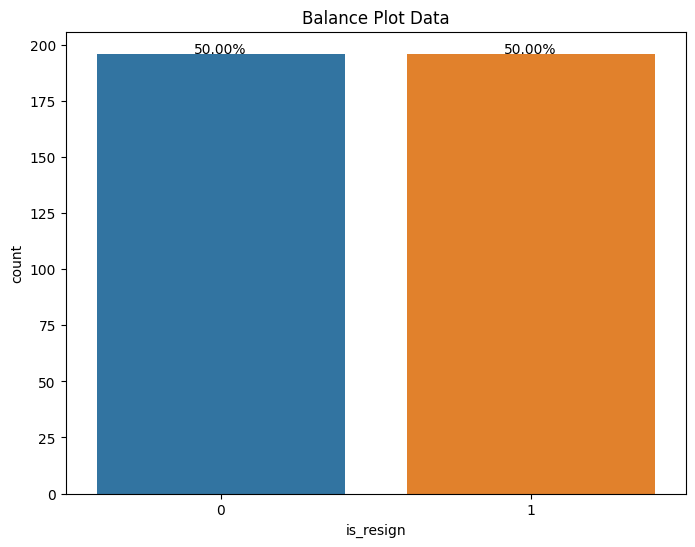

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

#under_sampler = RandomUnderSampler(random_state=42)
#x_res, y_res = under_sampler.fit_resample(x, y)

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=y_res, x='is_resign')
for p in ax.patches:
    text = f'{p.get_height()/len(y_res)*100:.2f}%'
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), text, ha='center')
ax.set_title('Balance Plot Data')
plt.show()


In [ ]:
x_res.shape,y_res.shape

((392, 33), (392, 1))

### split data train and test

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train , X_test , y_train , y_test = train_test_split(x_res, y_res, test_size = 0.25, random_state= 42)

In [ ]:
X1 = x_res.copy() # x1 dan y1 digunakan untuk eksperimen 1
y1 = y_res.copy()
X2 = x_res.copy() # x2 dan y2 digunakan untuk eksperimen 2
y2 = y_res.copy()

In [ ]:
from sklearn.model_selection import train_test_split
# 70 : 30
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1,y1,test_size=0.3, random_state=1)
# 80 : 20
X1_train2, X1_test2, y1_train2, y1_test2 = train_test_split(X1,y1,test_size=0.2, random_state=1)

In [ ]:
print('Split into 70:30')
print('Total rows & column of train set:',X1_train1.shape)
print('Total rows & column of test set:',X1_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X1_train2.shape)
print('Total rows & column of test set:',X1_test2.shape)

Split into 70:30
Total rows & column of train set: (274, 33)
Total rows & column of test set: (118, 33)

Split into 80:20
Total rows & column of train set: (313, 33)
Total rows & column of test set: (79, 33)


## Melatih model dengan berbagai algoritma ML yang ada, tentukan ML metrics yang sekiranya berkaitan dengan tujuan bisnis untuk menjadi benchmark pada ML model selection.
Hint: Perhatikan jenis metrics yang ada, lakukan training pada data yang sudah dilakukan imbalanced learning


In [ ]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))

    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def cfm(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
    plt.title('Confusion Matrix From Test Set',fontsize=18)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

### dataset 70:30

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X1_train1, y1_train1)

y_train_pred = logreg.predict(X1_train1)
y_pred = logreg.predict(X1_test1)

# Check Model Performance
eval_classification(logreg, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X1_train1,y1_train1)

y_train_pred = dt.predict(X1_train1)
y_pred = dt.predict(X1_test1)

eval_classification(dt, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X1_train1, y1_train1)

y_train_pred = rf.predict(X1_train1)
y_pred = rf.predict(X1_test1)

eval_classification(rf, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X1_train1,y1_train1)

y_train_pred = knn.predict(X1_train1)
y_pred = knn.predict(X1_test1)

eval_classification(knn, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.84
Precision (Train Set): 0.94
Precision (Test Set): 0.87
Recall (Train Set): 0.91
Recall (Test Set): 0.85
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.86
AUC (Train Set): 0.93
AUC (Test Set): 0.84


#### XGBoost

In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X1_train1, y1_train1)

y_train_pred = xgboost_model.predict(X1_train1)
y_pred = xgboost_model.predict(X1_test1)

eval_classification(xgboost_model, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


### dataset 80:20

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X1_train2, y1_train2)

y_train_pred = logreg.predict(X1_train2)
y_pred = logreg.predict(X1_test2)

# Check Model Performance
eval_classification(logreg, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X1_train2,y1_train2)

y_train_pred = dt.predict(X1_train2)
y_pred = dt.predict(X1_test2)

eval_classification(dt, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X1_train2, y1_train2)

y_train_pred = rf.predict(X1_train2)
y_pred = rf.predict(X1_test2)

eval_classification(rf, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X1_train2,y1_train2)

y_train_pred = knn.predict(X1_train2)
y_pred = knn.predict(X1_test2)

eval_classification(knn, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.85
Precision (Train Set): 0.92
Precision (Test Set): 0.87
Recall (Train Set): 0.95
Recall (Test Set): 0.87
F1-Score (Train Set): 0.93
F1-Score (Test Set): 0.87
AUC (Train Set): 0.93
AUC (Test Set): 0.84


#### XGBoost

In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X1_train2, y1_train2)

y_train_pred = xgboost_model.predict(X1_train2)
y_pred = xgboost_model.predict(X1_test2)

eval_classification(xgboost_model, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 1.00
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 1.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 1.00
AUC (Train Set): 1.00
AUC (Test Set): 1.00


## Memilih ML model terbaik, kemudian melakukan hyperparameter tuning agar meningkatkan performa ML. Gunakan metode pipeline dan cross-validation agar menghasilkan model yang berkualitas.       
Hint: Perhatikan hyperparameter yang ada pada model terbaik, lakukan tuning yang optimal (bisa menggunakan random search, grid search, maupun bayesian search)


### KNN dataset 70:30

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='accuracy')
knn_tuned.fit(X1_train1, y1_train1)

y_train_pred = knn_tuned.predict(X1_train1)
y_pred = knn_tuned.predict(X1_test1)

eval_classification(knn_tuned, y_train_pred, y_pred, y1_train1, y1_test1)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.92
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 0.88
Recall (Test Set): 0.87
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.93
AUC (Train Set): 0.94
AUC (Test Set): 0.93


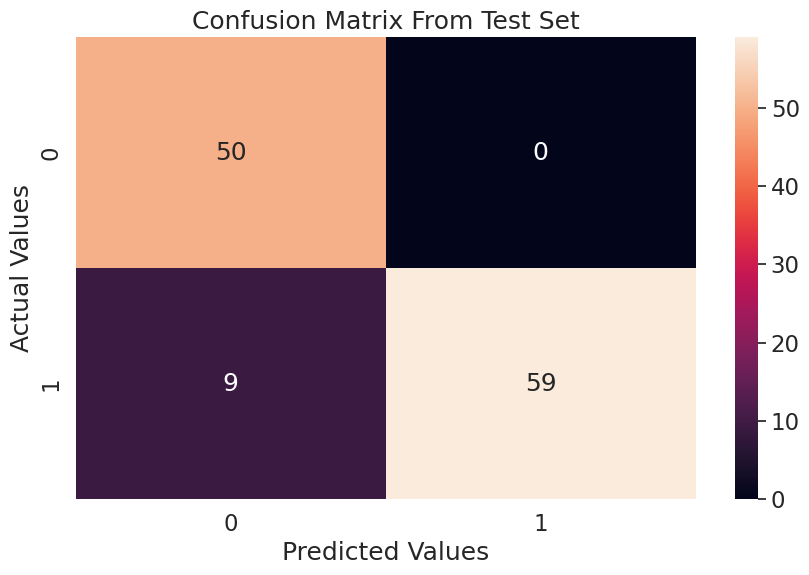

In [ ]:
cfm(y1_test1,y_pred)

### KNN dataset 80:20

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='accuracy')
knn_tuned.fit(X1_train2, y1_train2)

y_train_pred = knn_tuned.predict(X1_train2)
y_pred = knn_tuned.predict(X1_test2)

eval_classification(knn_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 0.89
Recall (Test Set): 0.89
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.94
AUC (Train Set): 0.95
AUC (Test Set): 0.95


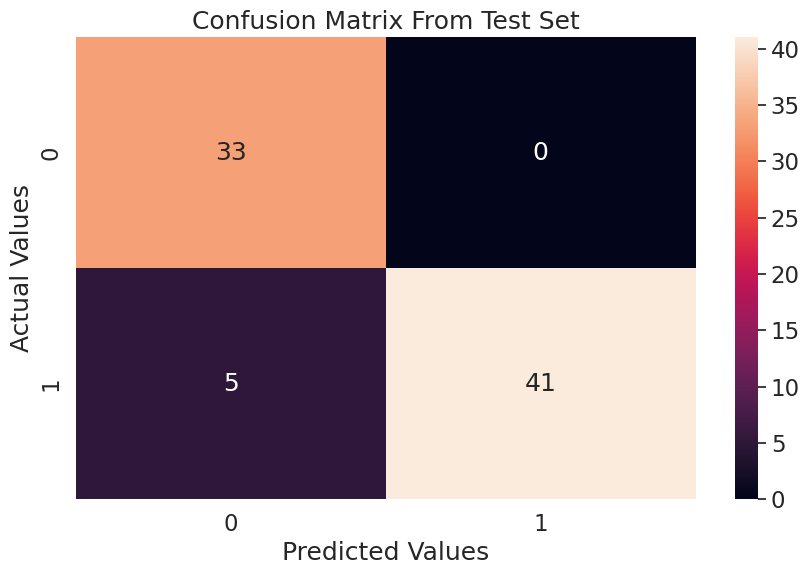

In [ ]:
cfm(y1_test2,y_pred)

## Menampilkan visualisasi dari ML metrics yang diukur, tunjukan pula bahwa ML tidak bersifat diskriminatif ketika melakukan prediksi target
Hint: Tampilkan visualisasi seperti confusion matrix, ROC plot, atau yang lainnya



visualisasi ML terbaik.
ML terbaik diperoleh pada KNN yang telah dituning parameter.
Metrix utama yang digunakan adalah

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = dict(n_neighbors = list(range(1,30)),
                       p=[1,2],
                       algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

knn = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='accuracy')
knn_tuned.fit(X1_train2, y1_train2)

y_train_pred = knn_tuned.predict(X1_train2)
y_pred = knn_tuned.predict(X1_test2)

eval_classification(knn_tuned, y_train_pred, y_pred, y1_train2, y1_test2)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 0.89
Recall (Test Set): 0.89
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.94
AUC (Train Set): 0.95
AUC (Test Set): 0.95


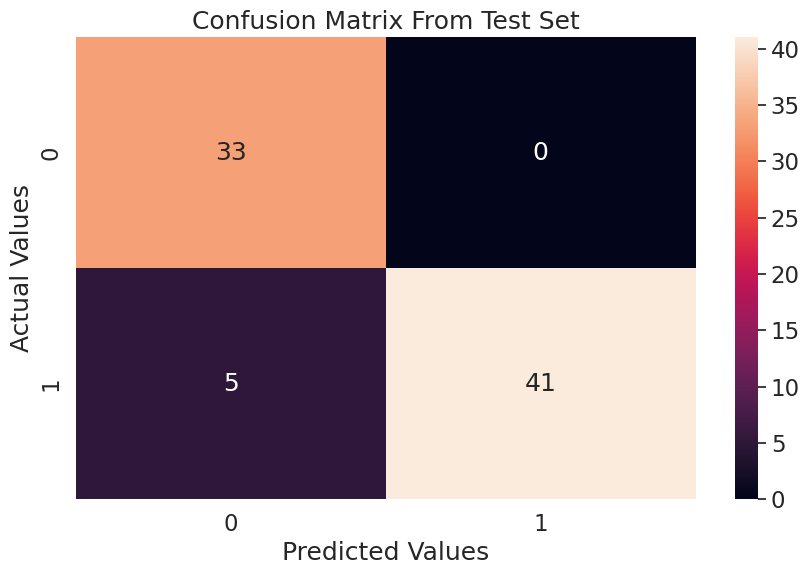

In [ ]:
cfm(y1_test2,y_pred)

In [ ]:
show_best_hyperparameter(knn_tuned.best_estimator_, hyperparameters)

Best n_neighbors: 29
Best p: 1
Best algorithm: kd_tree


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

knn_best = KNeighborsClassifier(n_neighbors=29,
                                p=1,
                                algorithm='kd_tree')

In [ ]:
knn_best.fit(X1_train2,y1_train2)

y_train_pred_best = knn_best.predict(X1_train2)
y_pred_best = knn_best.predict(X1_test2)

eval_classification(knn_best, y_train_pred_best, y_pred_best, y1_train2, y1_test2)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 0.89
Recall (Test Set): 0.89
F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.94
AUC (Train Set): 0.95
AUC (Test Set): 0.95


# Presenting Machine Learning Products to the Business Users

## Mencari metode Interpretable / Explainable AI yang ada untuk mendapatkan insight-insight yang berhubungan dengan permasalahan utama.
Hint: Gunakan Interpretable method apabila model machine learning berupa tree-based model (pendekatannya dengan membuat decision tree diagram), atau berupa regression-based model (pendekatannya dengan membuat math formula yang bisa diartikan). Namun, gunakanlah Explainable method apabila model machine learning merupakan ensemble method atau neural network seperti feature importance, partial dependence plot, shapley value, lime, dan lain-lain.


In [ ]:
def show_feature_importance(model, X):
    show_feature_importance(knn_tuned, X)


In [ ]:
!pip install shap

In [ ]:
model = knn_best

PermutationExplainer explainer: 314it [04:30,  1.12it/s]


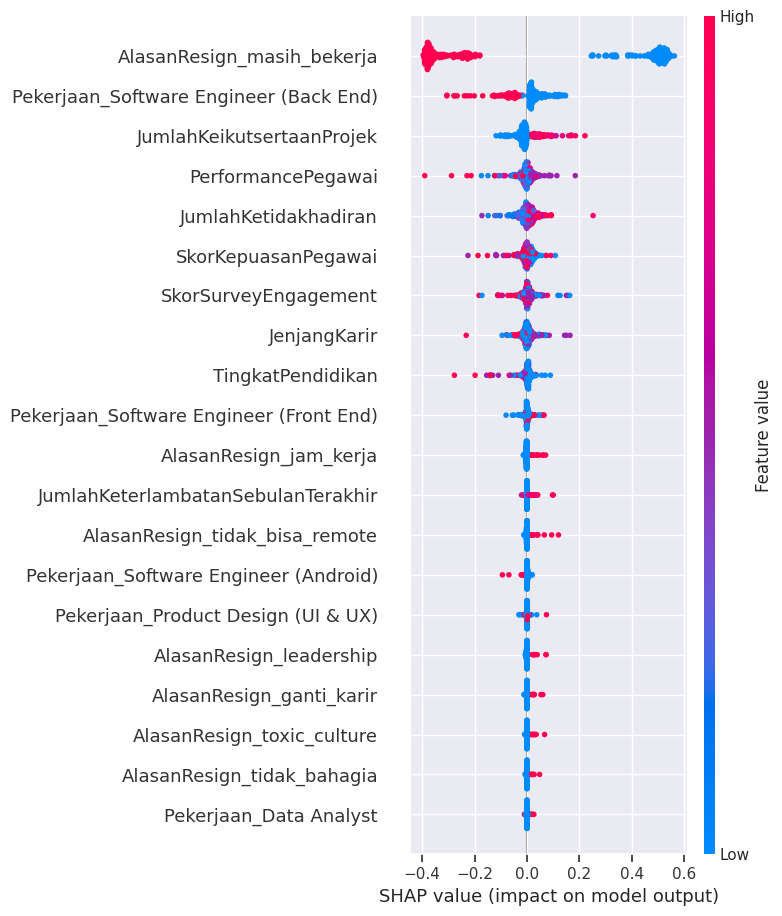

In [ ]:
import shap

# Buat fungsi prediksi yang dapat digunakan oleh SHAP
def model_predict(input_data):
    # Fungsi ini akan memanggil model.predict dengan input_data sebagai argumen
    return model.predict(input_data)

# Buat objek explainer SHAP KernelExplainer
explainer = shap.Explainer(model_predict, X1_train2)

# Hitung SHAP values
shap_values = explainer.shap_values(X1_train2)

# Plot summary plot
shap.summary_plot(shap_values, X1_train2)


## Mencari insight menarik dari alat-alat Interpretable / Explainable AI yang bisa menjawab pertanyaan bisnis seputar kepegawaian perusahaan.   
Hint: Carilah variabel yang paling mempengaruhi orang untuk melakukan resign, atau berapa besar perbedaan pengaruh predictive power antara variabel A dan B dengan skala yang ada, kemudian adakah threshold tertentu (angka) yang bisa membuat orang itu memiliki probabilitas resign lebih tinggi dibanding yang lain, dan lain-lain



variabel yang dapat memengaruhi karyawan untuk melakukan resign adalah jumlah keikut sertaan projek. hal tersebut dapat disebabkan oleh beban kerja dari projek yang diikuti oleh karyawan.
selain itu kondisi karyawan yang kurang baik atau cenderung akan melakukan resign dapat dilihat melalui performance karyawan, dan jumlah ketidak hadiran.